In [5]:
!pip install tensorflow pandas numpy

import os
import pandas as pd
import numpy as np

You should consider upgrading via the 'C:\Users\rubel\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
import tensorflow as tf

In [11]:
# !pip install openpyxl
import os
import pandas as pd
import numpy as np

In [12]:
df = pd.read_excel("C:/Users/rubel/Downloads/open-meteo-30.76N79.16E4716m.xlsx", header=3)
df = df[1:]
df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),snowfall (cm),rain (mm),wind_speed_10m (km/h),wind_speed_100m (km/h)
1,1990-08-01 01:00:00,3.9,81,0.0,0.0,0.0,3.4,7.0
2,1990-08-01 02:00:00,5.5,77,0.0,0.0,0.0,3.8,7.2
3,1990-08-01 03:00:00,7.2,66,0.0,0.0,0.0,3.7,7.6
4,1990-08-01 04:00:00,8.8,55,0.0,0.0,0.0,3.9,7.7
5,1990-08-01 05:00:00,10.1,56,0.0,0.0,0.0,3.1,6.6


In [13]:
df.index = pd.to_datetime(df['time'], format='%Y.%m.%d %H:%M:%S')
df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),snowfall (cm),rain (mm),wind_speed_10m (km/h),wind_speed_100m (km/h)
time,,,,,,,,
1990-08-01 01:00:00,1990-08-01 01:00:00,3.9,81,0.0,0.0,0.0,3.4,7.0
1990-08-01 02:00:00,1990-08-01 02:00:00,5.5,77,0.0,0.0,0.0,3.8,7.2
1990-08-01 03:00:00,1990-08-01 03:00:00,7.2,66,0.0,0.0,0.0,3.7,7.6
1990-08-01 04:00:00,1990-08-01 04:00:00,8.8,55,0.0,0.0,0.0,3.9,7.7
1990-08-01 05:00:00,1990-08-01 05:00:00,10.1,56,0.0,0.0,0.0,3.1,6.6


In [14]:
df.describe()

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),snowfall (cm),rain (mm),wind_speed_10m (km/h),wind_speed_100m (km/h)
count,306839,306839.000000,306839.000000,306839.000000,306839.000000,306839.000000,306839.000000,306839.000000
mean,2008-01-31 11:59:59.999999488,-5.149277,64.870551,0.130560,0.062522,0.043376,3.658259,5.593923
min,1990-08-01 01:00:00,-28.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999-05-02 06:30:00,-11.300000,46.000000,0.000000,0.000000,0.000000,2.200000,3.200000
50%,2008-01-31 12:00:00,-5.200000,71.000000,0.000000,0.000000,0.000000,3.300000,5.000000
75%,2016-10-31 17:30:00,2.000000,86.000000,0.000000,0.000000,0.000000,4.700000,7.300000
max,2025-08-01 23:00:00,13.900000,100.000000,8.900000,6.020000,8.000000,16.600000,40.700000
std,NaN,7.864165,25.480632,0.405619,0.243816,0.185286,2.040345,3.345147


# start here


In [15]:
df['Seconds'] = df.index.map(pd.Timestamp.timestamp)
df

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),snowfall (cm),rain (mm),wind_speed_10m (km/h),wind_speed_100m (km/h),Seconds
time,,,,,,,,,
1990-08-01 01:00:00,1990-08-01 01:00:00,3.9,81,0.0,0.0,0.0,3.4,7.0,6.494724e+08
1990-08-01 02:00:00,1990-08-01 02:00:00,5.5,77,0.0,0.0,0.0,3.8,7.2,6.494760e+08
1990-08-01 03:00:00,1990-08-01 03:00:00,7.2,66,0.0,0.0,0.0,3.7,7.6,6.494796e+08
1990-08-01 04:00:00,1990-08-01 04:00:00,8.8,55,0.0,0.0,0.0,3.9,7.7,6.494832e+08
1990-08-01 05:00:00,1990-08-01 05:00:00,10.1,56,0.0,0.0,0.0,3.1,6.6,6.494868e+08
...,...,...,...,...,...,...,...,...,...
2025-08-01 19:00:00,2025-08-01 19:00:00,0.4,90,0.0,0.0,0.0,7.7,3.9,1.754075e+09
2025-08-01 20:00:00,2025-08-01 20:00:00,0.7,89,0.0,0.0,0.0,8.1,5.0,1.754078e+09
2025-08-01 21:00:00,2025-08-01 21:00:00,-1.2,93,0.0,0.0,0.0,10.1,4.8,1.754082e+09


In [16]:
day = 60*60*24
year = 365.2425*day

df['Day sin'] = np.sin(df['Seconds'] * (2* np.pi / day))
df['Day cos'] = np.cos(df['Seconds'] * (2 * np.pi / day))
df['Year sin'] = np.sin(df['Seconds'] * (2 * np.pi / year))
df['Year cos'] = np.cos(df['Seconds'] * (2 * np.pi / year))
df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),snowfall (cm),rain (mm),wind_speed_10m (km/h),wind_speed_100m (km/h),Seconds,Day sin,Day cos,Year sin,Year cos
time,,,,,,,,,,,,,
1990-08-01 01:00:00,1990-08-01 01:00:00,3.9,81,0.0,0.0,0.0,3.4,7.0,649472400.0,0.258819,0.965926,-0.487036,-0.873382
1990-08-01 02:00:00,1990-08-01 02:00:00,5.5,77,0.0,0.0,0.0,3.8,7.2,649476000.0,0.500000,0.866025,-0.487662,-0.873032
1990-08-01 03:00:00,1990-08-01 03:00:00,7.2,66,0.0,0.0,0.0,3.7,7.6,649479600.0,0.707107,0.707107,-0.488288,-0.872683
1990-08-01 04:00:00,1990-08-01 04:00:00,8.8,55,0.0,0.0,0.0,3.9,7.7,649483200.0,0.866025,0.500000,-0.488913,-0.872332
1990-08-01 05:00:00,1990-08-01 05:00:00,10.1,56,0.0,0.0,0.0,3.1,6.6,649486800.0,0.965926,0.258819,-0.489538,-0.871982


In [17]:
df = df.drop(['Seconds','time','rain (mm)','wind_speed_100m (km/h)'], axis=1)


In [18]:
df.head()

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),snowfall (cm),wind_speed_10m (km/h),Day sin,Day cos,Year sin,Year cos
time,,,,,,,,,
1990-08-01 01:00:00,3.9,81,0.0,0.0,3.4,0.258819,0.965926,-0.487036,-0.873382
1990-08-01 02:00:00,5.5,77,0.0,0.0,3.8,0.500000,0.866025,-0.487662,-0.873032
1990-08-01 03:00:00,7.2,66,0.0,0.0,3.7,0.707107,0.707107,-0.488288,-0.872683
1990-08-01 04:00:00,8.8,55,0.0,0.0,3.9,0.866025,0.500000,-0.488913,-0.872332
1990-08-01 05:00:00,10.1,56,0.0,0.0,3.1,0.965926,0.258819,-0.489538,-0.871982


In [23]:
def df_to_X_y(df, window_size=7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = df_as_np[i:i + window_size]  # 7 rows of full features
        X.append(row)

        label = df_as_np[i + window_size][:5]  # target: first 5 columns only
        y.append(label)

    return np.array(X), np.array(y)


In [99]:
X_full, y_full = df_to_X_y(df)
X_full.shape, y_full.shape

((306832, 7, 9), (306832, 5))

In [100]:
train_size = int(len(X_full) * 0.75)
val_size = int(len(X_full) * 0.15)

X_train_full, y_train_full = X_full[:train_size], y_full[:train_size]
X_val_full, y_val_full = X_full[train_size:train_size+val_size], y_full[train_size:train_size+val_size]
X_test_full, y_test_full = X_full[train_size+val_size:], y_full[train_size+val_size:]
X_train_full.shape, y_train_full.shape, X_val_full.shape, y_val_full.shape, X_test_full.shape, y_test_full.shape

((230124, 7, 9),
 (230124, 5),
 (46024, 7, 9),
 (46024, 5),
 (30684, 7, 9),
 (30684, 5))

In [101]:
X_train_full[0][1]

array([ 5.5       , 77.        ,  0.        ,  0.        ,  3.8       ,
        0.5       ,  0.8660254 , -0.4876623 , -0.87303235])

In [102]:
means_full = X_train_full.mean(axis=(0, 1))
stds_full = X_train_full.std(axis=(0, 1))

def preprocess(X):
    return (X - means_full) / stds_full


In [103]:
X_train_full = preprocess(X_train_full)
X_val_full = preprocess(X_val_full)
X_test_full = preprocess(X_test_full)

In [104]:
X_train_full[0][1]

array([ 1.27783358,  0.3907284 , -0.34249407, -0.26183478,  0.36965822,
        0.70708189,  1.22477731, -0.67616137, -1.23465791])

In [105]:
output_means_full = means_full[:5]
output_stds_full = stds_full[:5]

def preprocess_output(y):
    return (y - output_means_full) / output_stds_full

In [106]:
y_train_full = preprocess_output(y_train_full)
y_val_full = preprocess_output(y_val_full)
y_test_full = preprocess_output(y_test_full)

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer(input_shape=(7, 9)))   # 7 time steps, 9 features
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5))  # You're predicting 5 outputs: temp, RH, precip, wind, snowfall

model.summary()

c:\Users\rubel\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 7, 256)         │       272,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 7, 128)         │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525,317 (2.00 MB)

 Trainable params: 525,317 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
from tensorflow.keras.callbacks import EarlyStopping
cp = ModelCheckpoint('model/model.keras', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [109]:
model.fit(X_train_full, y_train_full, validation_data=(X_val_full, y_val_full),
          epochs=50, batch_size=64,
          callbacks=[early_stop, cp])

Epoch 1/50
3596/3596 ━━━━━━━━━━━━━━━━━━━━ 73s 19ms/step - loss: 0.1787 - root_mean_squared_error: 0.4227 - val_loss: 0.3948 - val_root_mean_squared_error: 0.6283
Epoch 2/50
3596/3596 ━━━━━━━━━━━━━━━━━━━━ 70s 19ms/step - loss: 0.0764 - root_mean_squared_error: 0.2764 - val_loss: 0.3265 - val_root_mean_squared_error: 0.5714
Epoch 3/50
3596/3596 ━━━━━━━━━━━━━━━━━━━━ 67s 19ms/step - loss: 0.0696 - root_mean_squared_error: 0.2637 - val_loss: 0.3139 - val_root_mean_squared_error: 0.5603
Epoch 4/50
3596/3596 ━━━━━━━━━━━━━━━━━━━━ 67s 19ms/step - loss: 0.0664 - root_mean_squared_error: 0.2578 - val_loss: 0.3063 - val_root_mean_squared_error: 0.5534
Epoch 5/50
3596/3596 ━━━━━━━━━━━━━━━━━━━━ 65s 18ms/step - loss: 0.0648 - root_mean_squared_error: 0.2545 - val_loss: 0.2978 - val_root_mean_squared_error: 0.5457
Epoch 6/50
3596/3596 ━━━━━━━━━━━━━━━━━━━━ 66s 18ms/step - loss: 0.0634 - root_mean_squared_error: 0.2518 - val_loss: 0.3019 - val_root_mean_squared_error: 0.5495
Epoch 7/50
3596/3596 ━━━━━━━

In [19]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [20]:
tf.config.list_physical_devices('GPU')


[]

In [39]:
import tensorflow as tf

# List all physical devices
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# Show detailed device info
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


Num GPUs Available: 0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15933161563038255275
xla_global_id: -1
]


In [111]:
def postprocess(y_pred):
    return (y_pred * output_means_full[:y_pred.shape[1]]) + output_means_full[:y_pred.shape[1]]

7192/7192 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step


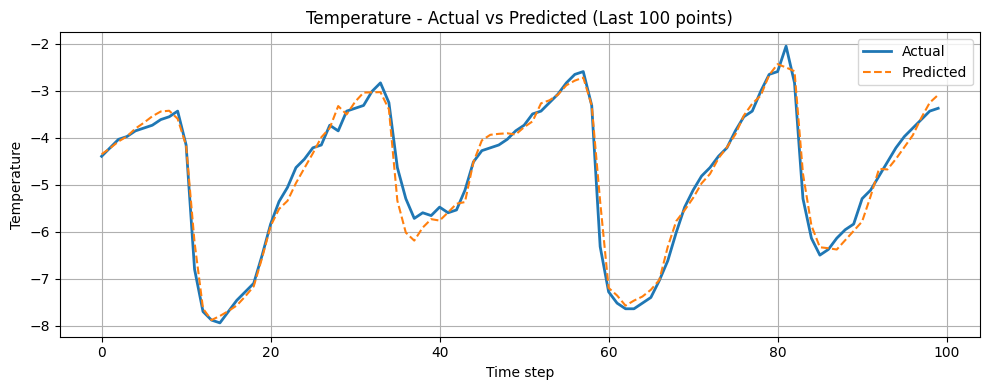

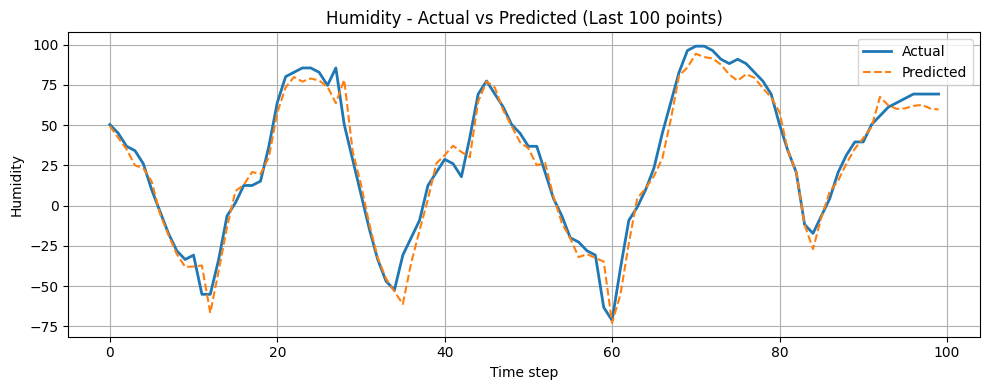

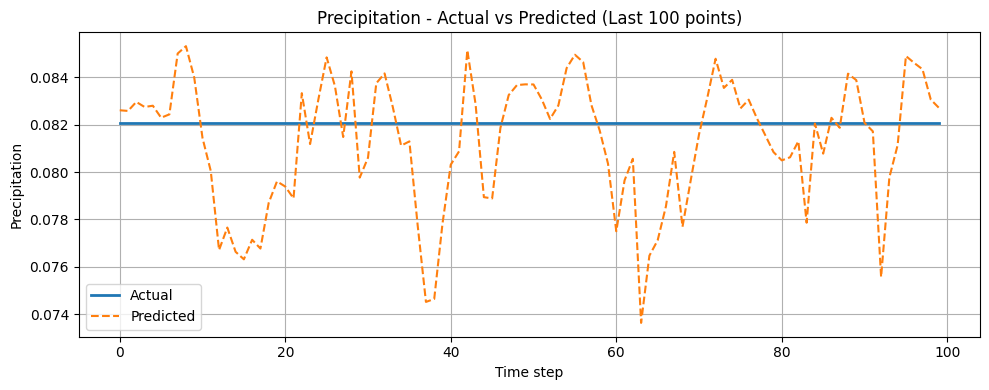

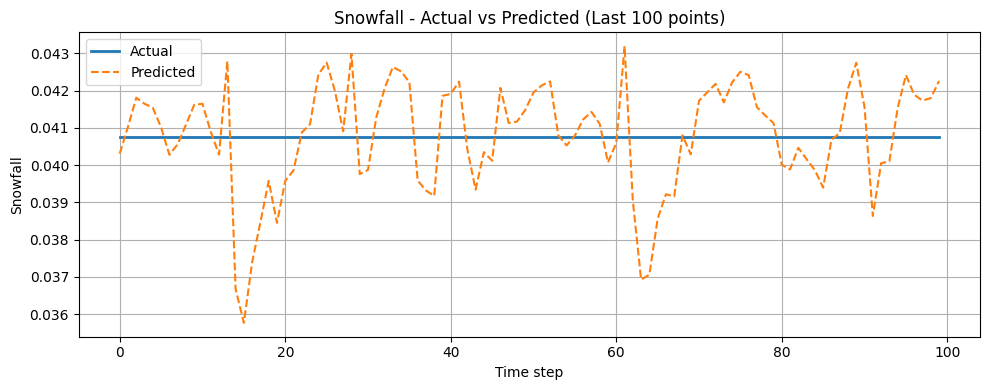

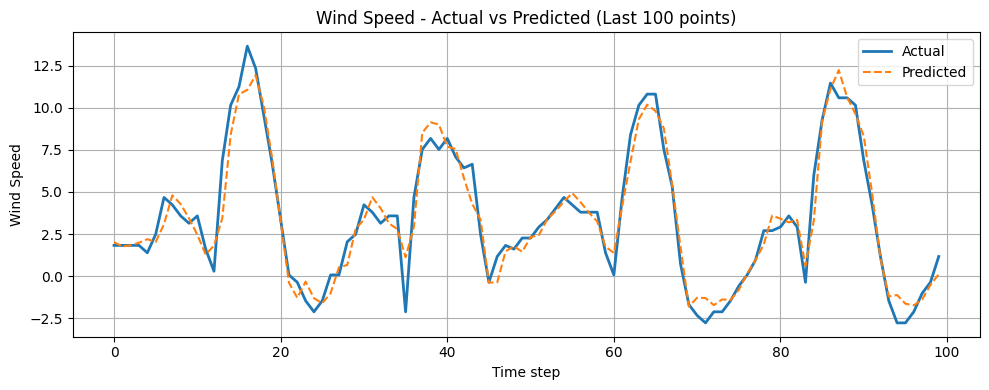

In [112]:
import matplotlib.pyplot as plt

def plot_predictions(y_true,X_test,model, variable_names=None):
    num_vars = y_true.shape[1]
    y_pred = model.predict(X_test)
    y_pred = postprocess(y_pred)
    y_true = postprocess(y_true)

    # Select only the last 100 data points
    y_true_last_100 = y_true[-100:]
    y_pred_last_100 = y_pred[-100:]

    if variable_names is None:
        variable_names = [f'Variable {i+1}' for i in range(num_vars)]

    for i in range(num_vars):
        plt.figure(figsize=(10, 4))
        plt.plot(y_true_last_100[:, i], label='Actual', linewidth=2)
        plt.plot(y_pred_last_100[:, i], label='Predicted', linestyle='--')
        plt.title(f'{variable_names[i]} - Actual vs Predicted (Last 100 points)')
        plt.xlabel('Time step')
        plt.ylabel(variable_names[i])
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()



# Example variable names
var_names = ['Temperature', 'Humidity', 'Precipitation', 'Snowfall', 'Wind Speed']

# Call the function
plot_predictions(y_train_full, X_train_full,model, variable_names=var_names)

#Last 10 year data
# I used last 10 year weather data, as weather variables changed over the years, and also got better result using 10 years data.



In [21]:
last_date = df.index.max()
start_date = last_date - pd.DateOffset(years=15)
df_recent = df[df.index >= start_date]

In [24]:
X, y = df_to_X_y(df_recent)
X.shape, y.shape

((131490, 7, 9), (131490, 5))

In [25]:
train_size = int(len(X) * 0.75)
val_size = int(len(X) * 0.15)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((98617, 7, 9),
 (98617, 5),
 (19723, 7, 9),
 (19723, 5),
 (13150, 7, 9),
 (13150, 5))

In [26]:
means = X_train.mean(axis=(0, 1))
stds = X_train.std(axis=(0, 1))

def preprocess(X):
    return (X - means) / stds

In [27]:
X_train = preprocess(X_train)
X_val = preprocess(X_val)
X_test = preprocess(X_test)

In [28]:
output_means = means[:5]
output_stds = stds[:5]

def preprocess_output(y):
    return (y - output_means) / output_stds

In [29]:
y_train = preprocess_output(y_train)
y_val = preprocess_output(y_val)
y_test = preprocess_output(y_test)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer(input_shape=(7, 9)))   # 7 time steps, 9 features
model1.add(LSTM(256, return_sequences=True))
model1.add(LSTM(128, return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(64))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(5))  # You're predicting 5 outputs: temp, RH, precip, wind, snowfall

model1.summary()

c:\Users\rubel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 256)         │       272,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 7, 128)         │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525,317 (2.00 MB)

 Trainable params: 525,317 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
cp = ModelCheckpoint('model/model_recent_15.keras', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [32]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val),
          epochs=50, batch_size=64,
          callbacks=[early_stop, cp])

Epoch 1/50
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - loss: 0.3148 - root_mean_squared_error: 0.5610 - val_loss: 0.2419 - val_root_mean_squared_error: 0.4918
Epoch 2/50
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 0.1226 - root_mean_squared_error: 0.3501 - val_loss: 0.1586 - val_root_mean_squared_error: 0.3983
Epoch 3/50
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 0.0973 - root_mean_squared_error: 0.3120 - val_loss: 0.1481 - val_root_mean_squared_error: 0.3848
Epoch 4/50
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - loss: 0.0916 - root_mean_squared_error: 0.3027 - val_loss: 0.1463 - val_root_mean_squared_error: 0.3824
Epoch 5/50
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 0.0888 - root_mean_squared_error: 0.2979 - val_loss: 0.1437 - val_root_mean_squared_error: 0.3790
Epoch 6/50
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - loss: 0.0863 - root_mean_squared_error: 0.2938 - val_loss: 0.1410 - val_root_mean_squared_error: 0.3755
Epoch 7/50
1541/1541 ━━━━━━━

In [33]:
def postprocess(y_pred):
    return (y_pred * output_stds[:y_pred.shape[1]]) + output_means[:y_pred.shape[1]]

In [ ]:
!pip install matplotlib

3082/3082 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step


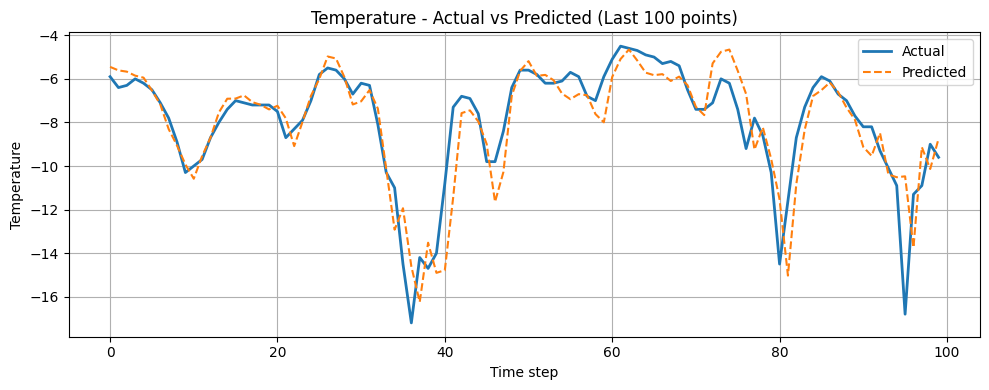

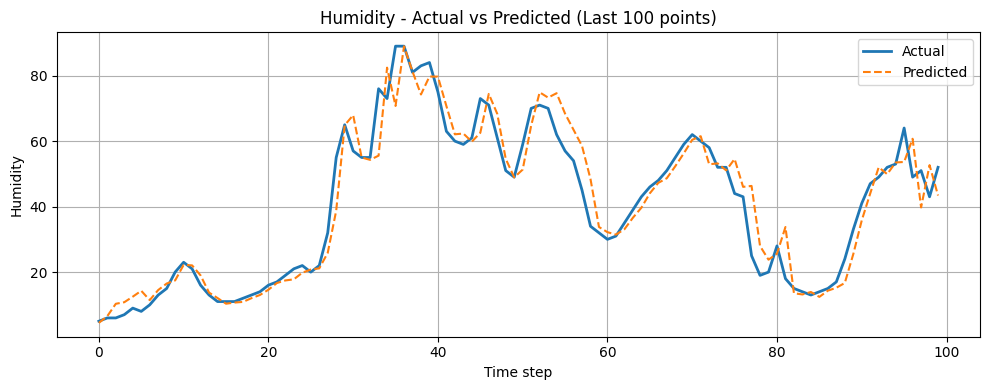

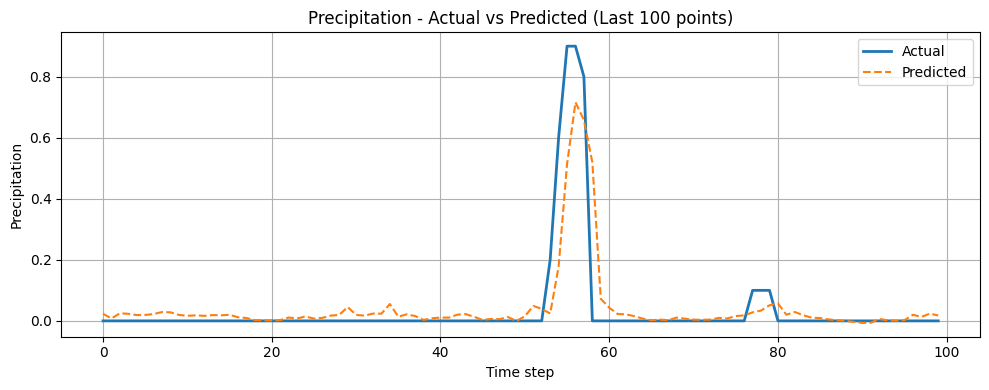

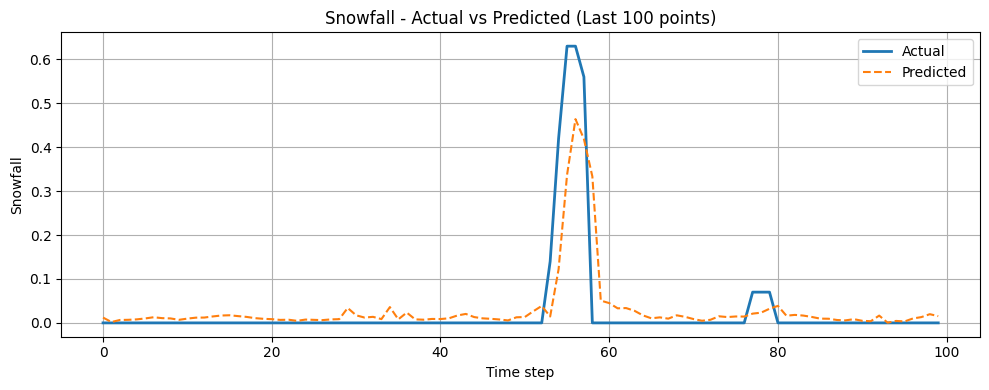

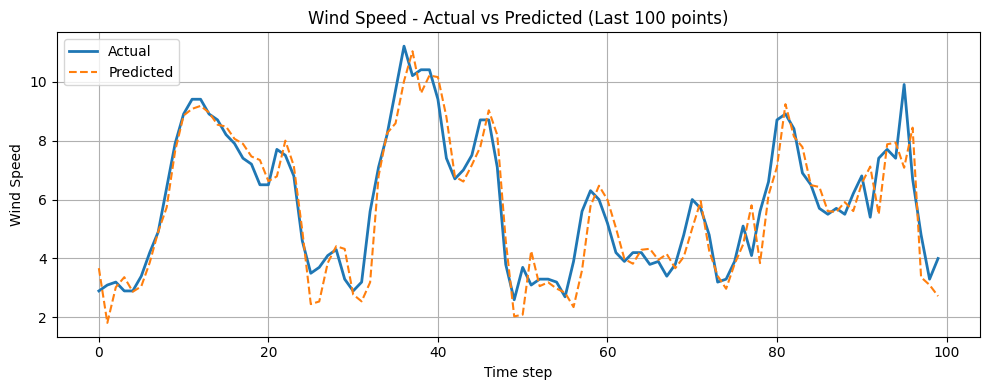

In [34]:
import matplotlib.pyplot as plt

def plot_predictions(y_true,X_test,model, variable_names=None):
    num_vars = y_true.shape[1]
    y_pred = model.predict(X_test)
    y_pred = postprocess(y_pred)
    y_true = postprocess(y_true)

    # Select only the last 100 data points
    y_true_last_100 = y_true[-100:]
    y_pred_last_100 = y_pred[-100:]

    if variable_names is None:
        variable_names = [f'Variable {i+1}' for i in range(num_vars)]

    for i in range(num_vars):
        plt.figure(figsize=(10, 4))
        plt.plot(y_true_last_100[:, i], label='Actual', linewidth=2)
        plt.plot(y_pred_last_100[:, i], label='Predicted', linestyle='--')
        plt.title(f'{variable_names[i]} - Actual vs Predicted (Last 100 points)')
        plt.xlabel('Time step')
        plt.ylabel(variable_names[i])
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()



# Example variable names
var_names = ['Temperature', 'Humidity', 'Precipitation', 'Snowfall', 'Wind Speed']

# Call the function
plot_predictions(y_train, X_train,model1, variable_names=var_names)

In [35]:
import pandas as pd
import numpy as np

# 1. Select the last 7 rows before the target time
target_time = pd.Timestamp('2025-07-03 16:00:00')
input_seq = df.loc[df.index < target_time].tail(7)

# 2. Check if you have enough data
if len(input_seq) < 7:
    raise ValueError("Not enough historical data for prediction.")

# 3. Convert to numpy and preprocess
X_input = input_seq.to_numpy().reshape(1, 7, 9)
X_input = preprocess(X_input)  # Use the correct preprocess function

# 4. Predict using the trained model
y_pred = model1.predict(X_input)

# 5. Postprocess to get actual values
y_pred_actual = postprocess(y_pred)

print("Predicted weather variables for", target_time)
print(y_pred_actual)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted weather variables for 2025-07-03 16:00:00
[[2.59402143e+00 9.05153292e+01 1.84890950e-01 2.46859365e-02
  2.52152123e+00]]
